In [7]:
%load_ext autoreload
%autoreload 2
import sys
paths = ['../models', '../dataset', '../util']
for path in paths:
    if path not in sys.path:
        sys.path.append(path)

import pandas as pd
import numpy as np

from keras.callbacks import CSVLogger, ReduceLROnPlateau, ModelCheckpoint

from unet import get_unet
from bounding_boxes import get_bounding_boxes
from data_generators import get_data_with_masks
from dataset import labels
from callbacks import ShowSegmentation

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
patch_size = 128
img_size = (576, 1024)

In [3]:
model = get_unet(input_shape=(3,)+img_size)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 3, 576, 1024)  0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 32, 576, 1024) 896         input_1[0][0]                    
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 32, 576, 1024) 9248        convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 32, 288, 512)  0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [4]:
train_data = pd.read_csv('../data/validation/train.csv')
val_data = pd.read_csv('../data/validation/test.csv')
bboxes = get_bounding_boxes('E:/Data/bounding_boxes')

Epoch 1/50
Epoch 00000: val_loss improved from inf to 1.81627, saving model to E:/Models/unet/model.00-3.67039275169.hdf5


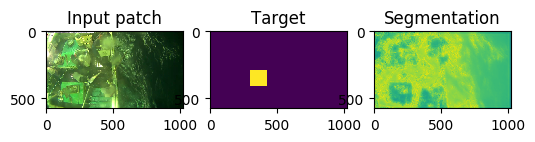

Label: [0 0 0 0 0 0 0 1]
Predicted: [ 0.43286416  0.04958626  0.06040064  0.0545883   0.24092047  0.06230638
  0.04976134  0.04957246]


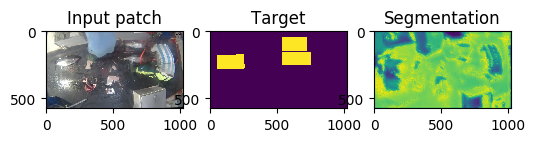

Label: [1 0 0 0 0 0 0 0]
Predicted: [ 0.44034415  0.04801397  0.05940404  0.05287293  0.24366532  0.0595151
  0.04818385  0.04800064]


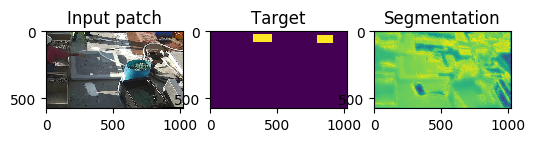

Label: [0 0 0 0 0 0 0 1]
Predicted: [ 0.4558382   0.04543474  0.05564962  0.04978667  0.24549949  0.05677705
  0.0455886   0.04542556]


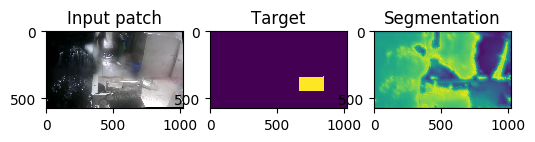

Label: [0 0 0 0 0 0 0 1]
Predicted: [ 0.35810915  0.06427237  0.07452383  0.06914859  0.23018049  0.07506128
  0.06444249  0.06426183]
1/1 [==============================] - 9s - loss: 3.6704 - img_label_loss: 2.7778 - dense_loss: 0.8926 - img_label_acc: 0.0000e+00 - img_label_categorical_crossentropy: 2.7778 - img_label_dice_coef: 0.3748 - dense_acc: 0.0035 - dense_categorical_crossentropy: 408.3340 - dense_dice_coef: 0.1074 - val_loss: 1.8163 - val_img_label_loss: 0.8246 - val_dense_loss: 0.9917 - val_img_label_acc: 1.0000 - val_img_label_categorical_crossentropy: 0.8246 - val_img_label_dice_coef: 0.6256 - val_dense_acc: 0.0000e+00 - val_dense_categorical_crossentropy: 27.7962 - val_dense_dice_coef: 0.0083
Epoch 2/50


KeyboardInterrupt: 

In [8]:
train = get_data_with_masks(train_data, bboxes, 'E:/Data/train', labels, img_size=img_size, 
                            flip=True, shift_x=2, shift_y=2, rot_range=5)
val = get_data_with_masks(val_data, bboxes, 'E:/Data/train', labels, img_size=img_size)
csv_logger = CSVLogger('../logging/run2_unet_full_image.csv')
lr_plateau = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.9)
checkpoint = ModelCheckpoint(filepath='E:/Models/unet/model.{epoch:02d}-{loss}.hdf5', verbose=1, save_best_only=True)
plot_segm = ShowSegmentation(val)

model.fit_generator(train, samples_per_epoch=1,
            nb_epoch=50, verbose=1,
            callbacks=[csv_logger, lr_plateau, checkpoint, plot_segm],
            validation_data=val, nb_val_samples=1)